In [1]:
import tensorflow as tf
import keras
from tensorflow import Tensor
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
from modules.dataset import DATASET_AUGMENTED_DIR


data: tf.data.Dataset[Tensor] = keras.utils.image_dataset_from_directory(
    DATASET_AUGMENTED_DIR
)

Found 9660 files belonging to 6 classes.


In [3]:
data_iterator = data.as_numpy_iterator()

In [4]:
batch = data_iterator.next()

In [5]:
batch

(array([[[[196.  , 192.  , 180.  ],
          [196.  , 192.  , 180.  ],
          [196.  , 192.  , 180.  ],
          ...,
          [222.25, 218.25, 206.25],
          [224.  , 220.  , 208.  ],
          [224.  , 220.  , 208.  ]],
 
         [[196.  , 192.  , 180.  ],
          [196.  , 192.  , 180.  ],
          [196.  , 192.  , 180.  ],
          ...,
          [222.5 , 218.5 , 206.5 ],
          [224.  , 220.  , 208.  ],
          [223.5 , 219.5 , 207.5 ]],
 
         [[196.  , 192.  , 180.  ],
          [196.  , 192.  , 180.  ],
          [196.  , 192.  , 180.  ],
          ...,
          [222.75, 218.75, 206.75],
          [223.  , 219.  , 207.  ],
          [222.25, 218.25, 206.25]],
 
         ...,
 
         [[200.  , 197.  , 190.  ],
          [200.  , 197.  , 190.  ],
          [200.  , 197.  , 190.  ],
          ...,
          [240.75, 237.75, 230.75],
          [241.25, 238.25, 231.25],
          [242.  , 239.  , 232.  ]],
 
         [[200.  , 197.  , 190.  ],
          [2

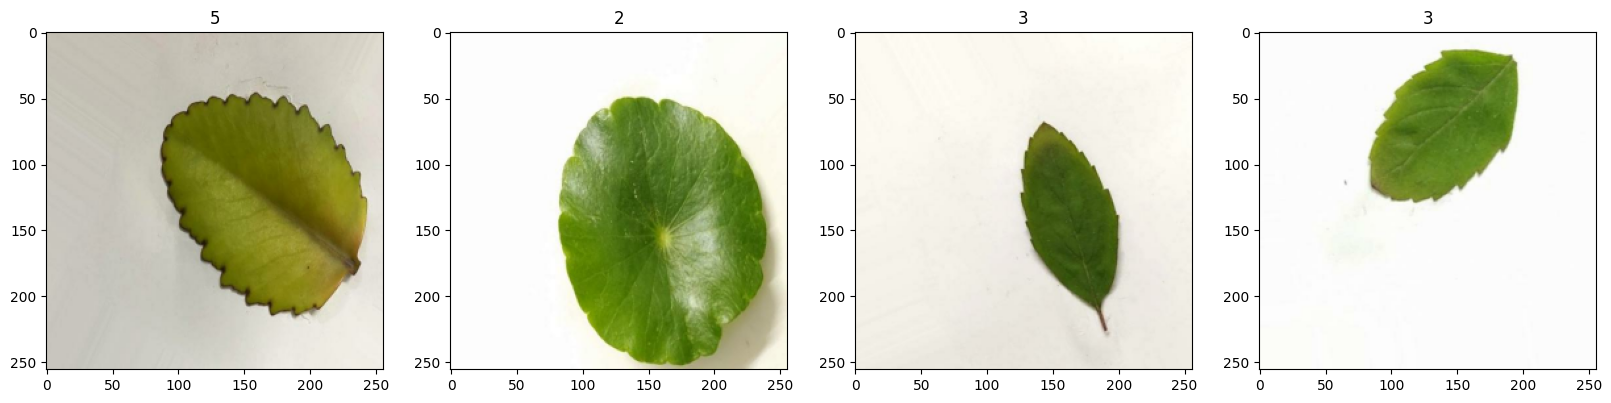

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
data = data.map(lambda x,y: (x/255, y))

In [8]:
data.as_numpy_iterator().next()

(array([[[[0.99019605, 0.9941176 , 0.9745098 ],
          [0.99019605, 0.9941176 , 0.9745098 ],
          [0.99019605, 0.9941176 , 0.9745098 ],
          ...,
          [0.9372549 , 0.93333334, 0.91764706],
          [0.9372549 , 0.93333334, 0.91764706],
          [0.9372549 , 0.93333334, 0.91764706]],
 
         [[0.9823529 , 0.9862745 , 0.96666664],
          [0.9823529 , 0.9862745 , 0.96666664],
          [0.9823529 , 0.9862745 , 0.96666664],
          ...,
          [0.9372549 , 0.93333334, 0.91764706],
          [0.9372549 , 0.93333334, 0.91764706],
          [0.9372549 , 0.93333334, 0.91764706]],
 
         [[0.9764706 , 0.98039216, 0.9607843 ],
          [0.9764706 , 0.98039216, 0.9607843 ],
          [0.9764706 , 0.98039216, 0.9607843 ],
          ...,
          [0.9411765 , 0.9372549 , 0.92156863],
          [0.9411765 , 0.9372549 , 0.92156863],
          [0.9411765 , 0.9372549 , 0.92156863]],
 
         ...,
 
         [[0.8862745 , 0.9019608 , 0.8980392 ],
          [0.89019

In [9]:
len(data)

302

In [10]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) + 1

In [11]:
train_size, val_size, test_size

(211, 60, 31)

In [12]:
train_size + val_size + test_size

302

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [14]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

d:\.R5-3600-Desktop\Documents\Code\ACLC-Butuan\Other\Herbal-Identification\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from modules.dataset import LOG_DIR


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)

In [21]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
181/211 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - accuracy: 0.1691 - loss: -128247136.0000

KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()